In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import tensorflow as tf

model_path = "/content/drive/MyDrive/glasses_classifier/best_glasses_classifier.keras"
model = tf.keras.models.load_model(model_path)

print("Modelo cargado")
model.summary()

Mounted at /content/drive
Modelo cargado


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,093 (301.15 KB)

 Trainable params: 25,697 (100.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 51,396 (200.77 KB)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Rescaling

IMG_SIZE = (64,64)
normalization = Rescaling(1./255)
class_names = ["with_glasses", "without_glasses"]


In [4]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = normalization(img_array)  # escala a [0,1]
    img_array = np.expand_dims(img_array, axis=0)  # (1,64,64,3)

    prob = model.predict(img_array)[0][0]
    pred = 1 if prob >= 0.5 else 0

    label = class_names[pred]
    confidence = prob if pred == 1 else 1 - prob

    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Pred: {label} (conf: {confidence:.2f})", color="green")
    plt.show()

    print(f"Imagen: {img_path}")
    print(f"Predicción: {label}")
    print(f"Confianza: {confidence:.4f}")


Saving conlentes.jpg to conlentes.jpg
Probando: conlentes.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


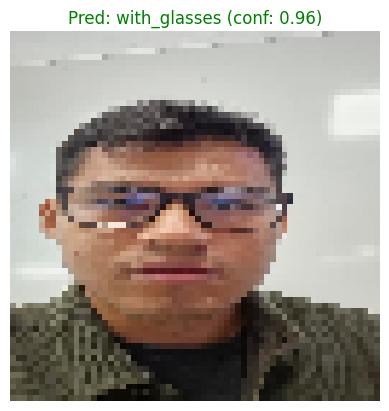

Imagen: conlentes.jpg
Predicción: with_glasses
Confianza: 0.9647


In [5]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    print("Probando:", fn)
    predict_image(fn)


Saving sinlentes.jpg to sinlentes (1).jpg
Probando: sinlentes (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


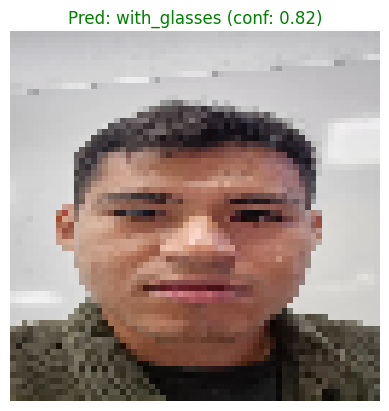

Imagen: sinlentes (1).jpg
Predicción: with_glasses
Confianza: 0.8226


In [6]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    print("Probando:", fn)
    predict_image(fn)
